## SEABORN

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It is easy to use and quite powerful.
If you are not using Anaconda you can install it by:

First install the library with:
    conda install seaborn or
    pip install seaborn

## IMPORTING

In [1]:
import seaborn as sns

We will divide the plots into
1. Categorical plots
2. Regression plots
3. Distribution plots
4. Grid plots
5. Matrix plots


Let's go through some categorical plots

## Categotical plots

1. Categorical estimate plots: pointplot(), barplot(), countplot()

2. Categorical scatterplots: stripplot(),swarmplot()

3. Categorical distribution plots: boxplot(), violinplot() ,boxenplot()

#### Barplot

Barplot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean. It shows point estimates and confidence intervals as rectangular bars. To use this plot we choose a categorical column for the x axis and a numerical column for the y axis  

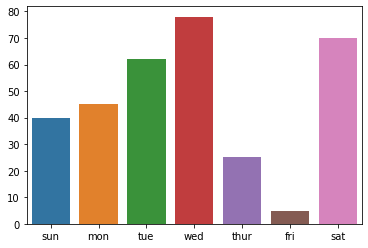

In [2]:
#let say for example
x = ['sun','mon','tue','wed','thur','fri','sat']
y = [40,45,62,78,25,5,70]
sns.barplot(x,y)

We can also use it for our dataset. We will be using the sample dataset provided by seaborn called 'tips'

In [3]:
#import the data
df = sns.load_dataset('tips')

#call head() to see the first 5rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


To plot remember I said we choose a categorical column for the x axis and a numerical column for the y axis
Our categorical features are(sex, smoker, day, time)
num. features(tip, size)

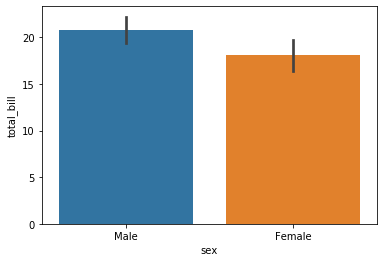

In [4]:
# let plot sex and total bill
sns.barplot(x='sex',y='total_bill',data = df)

Unlike matplotlib we dont have to specify the axises titles

Here 👆 we specified the x and y column and also the data i.e the name of the data set.
The default estimator is mean, we can specify a different estimator by passing estimator=std as arg for standard deviation for example.

We can add sns.set_style() before the code to have a grid in the background instead of a default white background
The paramenter for the set_style could be any of this darkgrid, whitegrid, dark, white, ticks

In [5]:
sns.set_style('darkgrid')

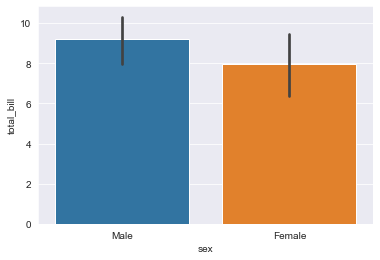

In [6]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data = df, estimator=np.std)

### Count plot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. It does not need y

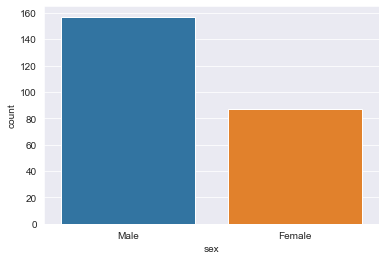

In [7]:
sns.countplot(x='sex',data=df)
#we can chage the x to any other categorical data

All what this plot is telling us how many males and females are in the data

Similar to doing something like this:
tips['sex'].value_counts()
value_count() will give the number of occurrences of a class in a column

### Boxplot

*Boxplot: A boxplot is sometimes known as the box and whisker plot.It shows the distribution of the quantitative data that represents the comparisons between variables. boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution i.e. the dots indicating the presence of outliers.
#to plot:

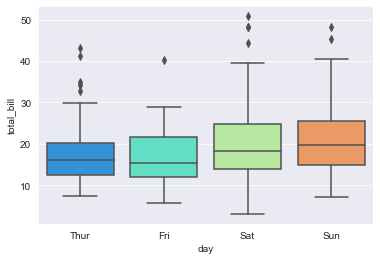

In [8]:
sns.boxplot(x="day", y="total_bill", data=df, palette='rainbow')

Here we specified x, y, data normally and added palette, this is a color specification used for boxplot cos each box will have to take up different colors. This plot gives us the total bill spent each day. 
Let's see another instance of a boxplot:

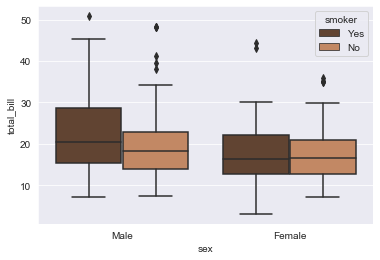

In [9]:
sns.boxplot(x="sex", y="total_bill", hue="smoker",data=df, palette="copper")


Notice a new argument 'hue'. In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.
The "hue” parameter is used to further add a categorical separation to the plot.  
By looking at the plot we can say that the people who smoke had a higher bill as compared to the people who don't smoked.

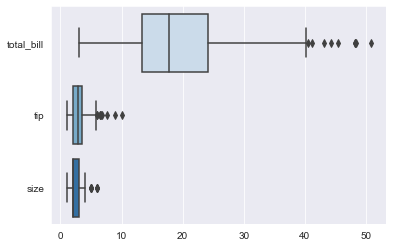

In [10]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=df,palette='Blues',orient='h')

### Violin Plot

A violin plot plays a similar role as a box and whisker plot(boxplot). It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

This can be an effective and attractive way to show multiple distributions
of data at once, but keep in mind that the estimation procedure is
influenced by the sample size, and violins for relatively small samples
might look misleadingly smooth.

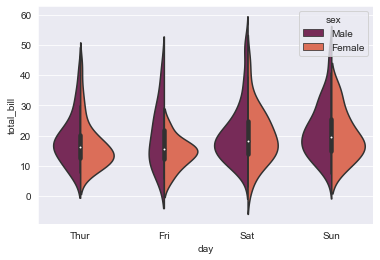

In [11]:
sns.violinplot(x="day", y="total_bill", data=df,hue='sex',split=True,palette='rocket')

Here hue is used to separate the data further using the sex category, setting split=True will draw half of a violin for each level. This can make it easier to directly compare the distribution

### Strip plot

It basically creates a scatter plot based on the category. It is also a good complement
to a box or violin plot in cases where you want to show all observations
along with some representation of the underlying distribution

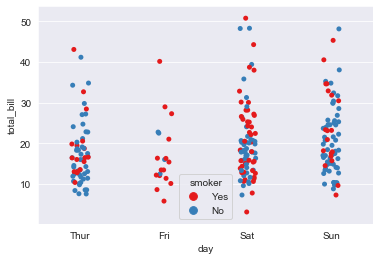

In [12]:
sns.stripplot(x ='day', y ='total_bill', data = df,  jitter = True, hue ='smoker',palette='Set1')

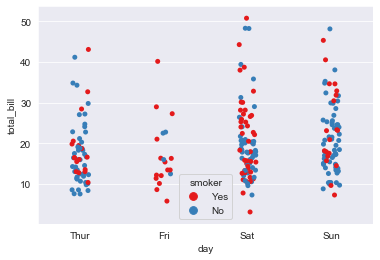

In [13]:
sns.stripplot(x ='day', y ='total_bill', data = df,  jitter = True, hue ='smoker',palette='Set1')

One problem with strip plot is that you can’t really tell which points are stacked on top of each other and hence we use the jitter parameter to add some random noise.
jitter parameter is used to add an amount of jitter (only along the categorical axis) which can be useful when you have many points and they overlap, so that it is easier to see the distribution.
hue is used to provide an addition categorical separation
setting dodge=True is used to draw separate strip plots based on the category specified by the hue parameter.

### Swarmplot

It is very similar to the stripplot except the fact that the points are adjusted so that they do not overlap.Some people also like combining the idea of a violin plot and a stripplot to form this plot. 

#plot 

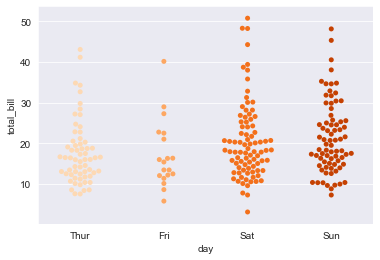

In [14]:
sns.swarmplot(x ='day', y ='total_bill', data = df, palette='Oranges')

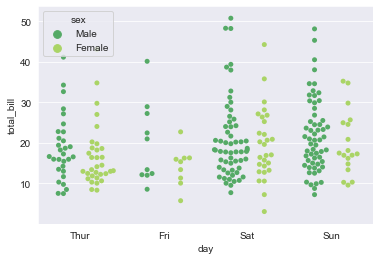

In [15]:
sns.swarmplot(x ='day', y ='total_bill', hue= 'sex', data = df, palette='summer', dodge= True)

Remember what we say about dodge

One drawback to using swarmplot is that sometimes they dont scale well to really large numbers and takes a lot of computation to arrange them. So in case we want to visualize a swarmplot properly we can plot it to on a violinplot.

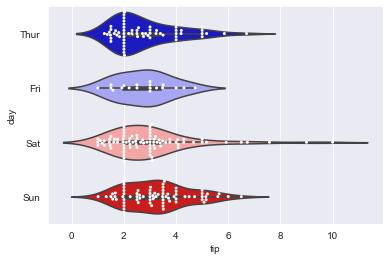

In [16]:
sns.violinplot(x="tip", y="day", data=df, palette='seismic')
sns.swarmplot(x="tip", y="day", data=df, color='white',size=3)

Dont be confused with the palette. You can use any name for it. type anything it the palette. If it not correct it will bring out list of correct ones and choose your taste. I love to play around with them

### Cat plot

It is the most general of all these plots and provides a parameter called 'kind' to choose the kind of plot we want thus saving us from the trouble of writing these plots separately. The kind parameter can be bar, violin, swarm, strip,box,boxen,point or count 

Note: It was formally called Factorplot but renamed to catplot. the factor plot function is still working but with an error signal
#plot

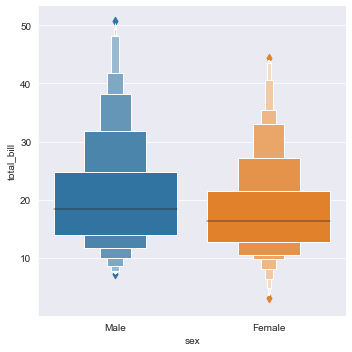

In [17]:
sns.catplot(x='sex',y='total_bill',data=df,kind='boxen')

## REGRESSION PLOTS

Regression plots in seaborn can be easily implemented with the help of the lmplot() function. lmplot() can be understood as a function that basically creates a linear model plot. lmplot() makes a very simple linear regression plot.It creates a scatter plot with a best linear fit line on top of it.
It is intended as a convenient interface to fit regression models across
conditional subsets of a dataset

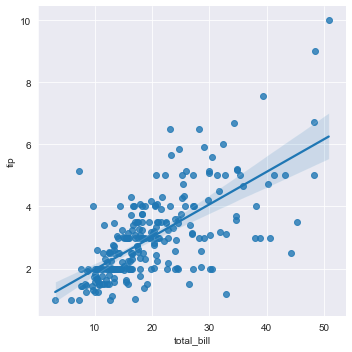

In [18]:
# Simple linear plot:
#still using the dataset
sns.lmplot(x='total_bill',y='tip',data=df)

x and y parameters are specified to provide values for the x and y axes. The data parameter is used to specify the source of information for drawing the plots.
We can add sns.set_style() before the code to have a grid in the background instead of a default white background

In order to have a better analysis capability using these plots, we can specify hue to have a categorical separation in our plot
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

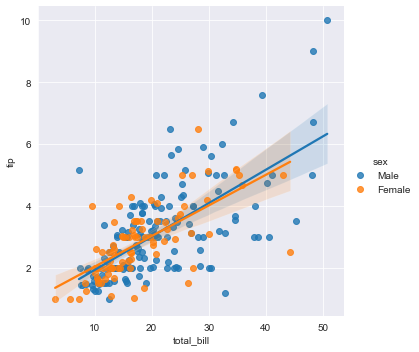

In [19]:
sns.lmplot(x='total_bill',y='tip',data=df,hue='sex')

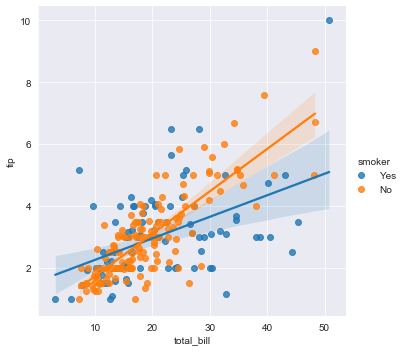

In [20]:
sns.lmplot(x='total_bill',y='tip',data=df,hue='smoker')

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

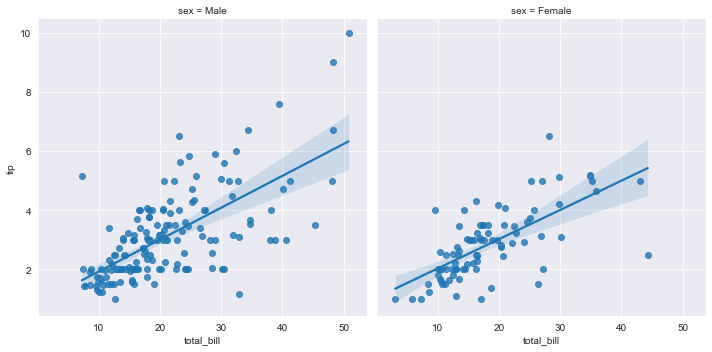

In [21]:
sns.lmplot(x='total_bill',y='tip',data=df,col='sex')

Now we can see the sex seperately

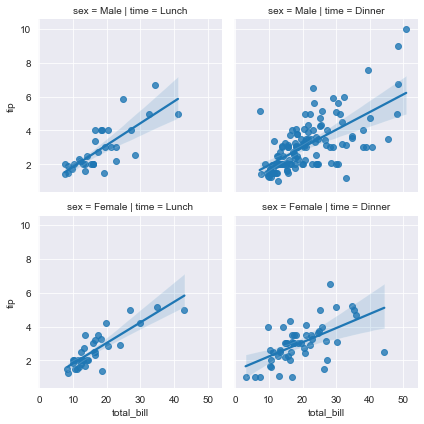

In [22]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=df,height=3,palette='coolwarm')

The height arg is just to reduce the size

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

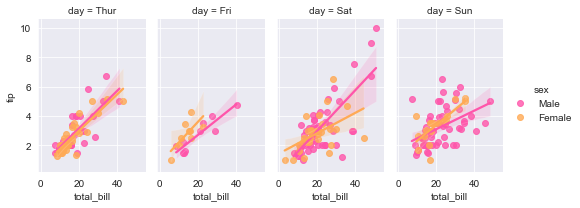

In [23]:
sns.lmplot(x='total_bill',y='tip',data=df,col='day',hue='sex',palette='spring',
          aspect=0.6,height=3)

## GRIDS

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

We will be using a different dataset still provided by seaborn called iris

In [24]:
iris = sns.load_dataset('iris')

In [25]:
#call head()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


So we will be treating
* Pair grid
* Pairplot
* Joint grid
* Facet grid

### Pair grid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.
This class maps each variable in a dataset onto a column and row in a
grid of multiple axes. Different axes-level plotting functions can be
used to draw bivariate plots in the upper and lower triangles, and the
the marginal distribution of each variable can be shown on the diagonal.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

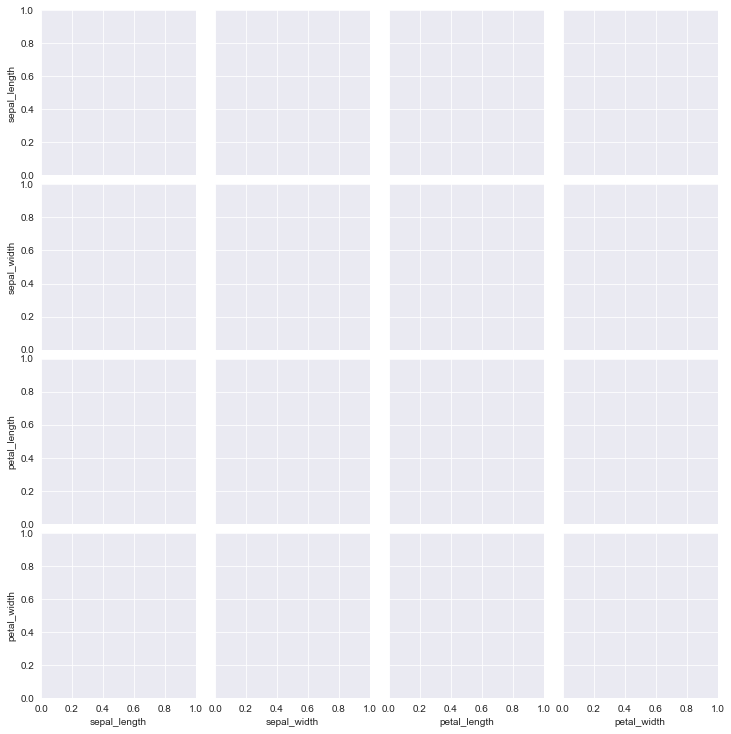

In [34]:
g = sns.PairGrid(iris)

All we did here is just to create an abriturary plot for all the dataset then we can map it to any type of plot we like 

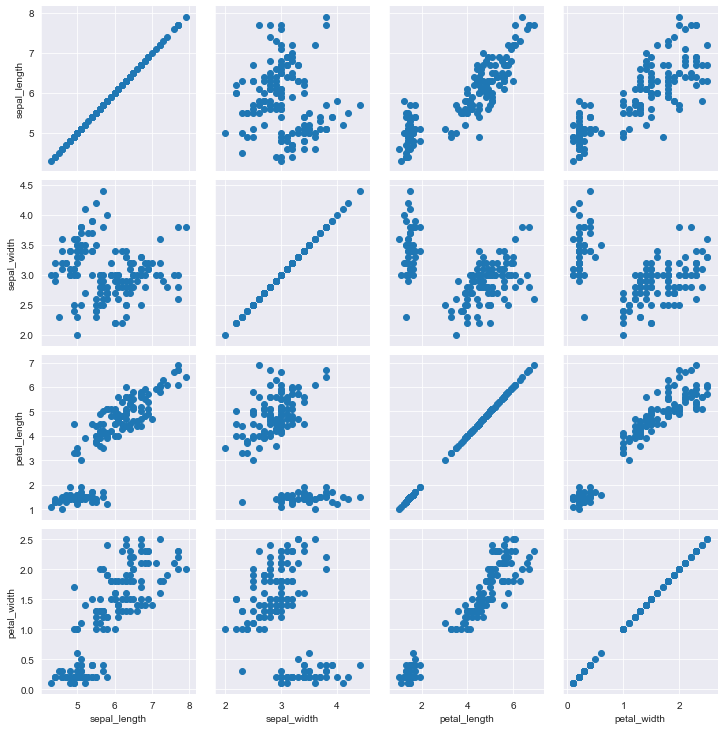

In [35]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

Now we map it to a scatter plot using matplotlib

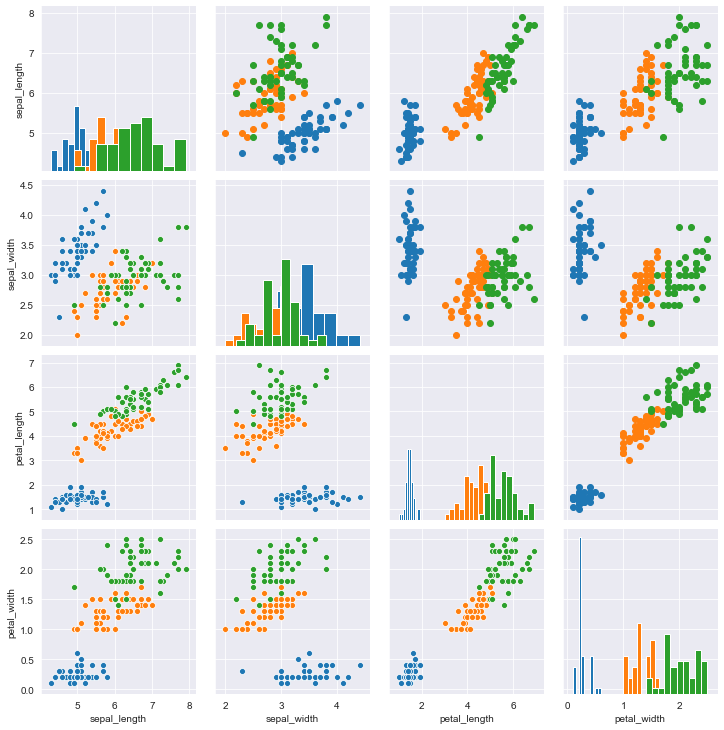

In [45]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(data = iris, hue = 'species')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.scatterplot)

### Pair plot

Pairplot is a simpler version of PairGrid (you'll use quite often). This is a high-level interface for :class:`PairGrid` that is intended to make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you need more flexibility.

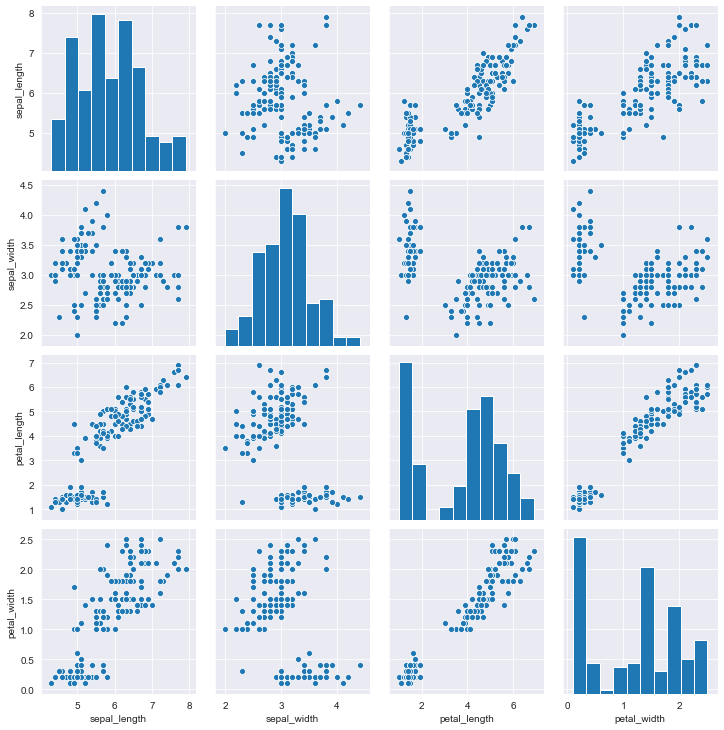

In [49]:
sns.pairplot(iris)

We can also add hue and palette

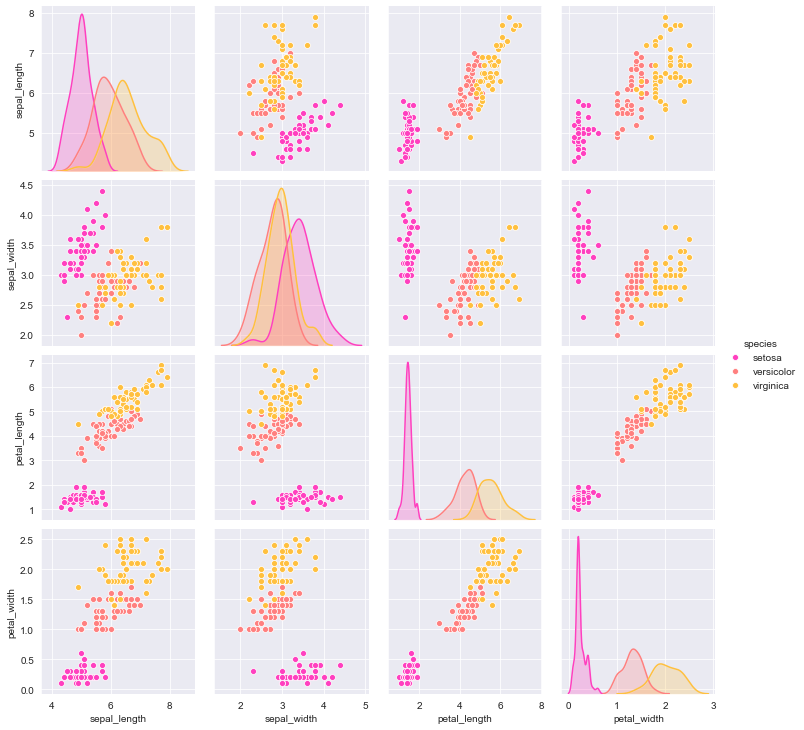

In [54]:
sns.pairplot(iris,hue='species', palette = 'spring')

### Facet Grid
FacetGrid is the general way to create grids of plots based off of a feature.This class maps a dataset onto multiple axes arrayed in a grid of rows and columns that correspond to *levels* of variables in the dataset.

For this one we use the tips dataset to understand better

In [55]:
tips = sns.load_dataset('tips')

In [56]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


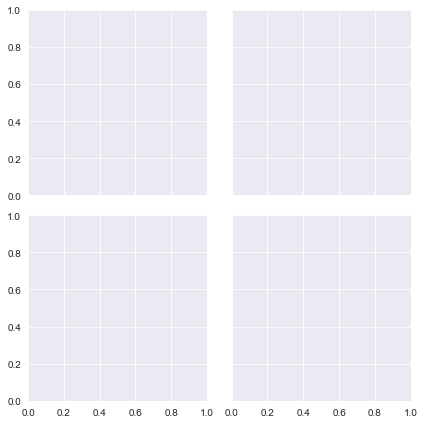

In [57]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

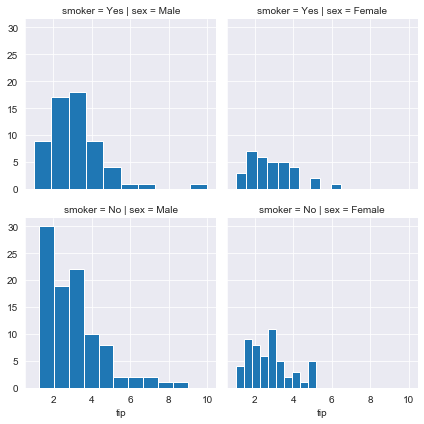

In [60]:
#Mapping the grids to plot like pairgrid
g = sns.FacetGrid(tips, col="sex",  row="smoker")
g = g.map(plt.hist, "tip")

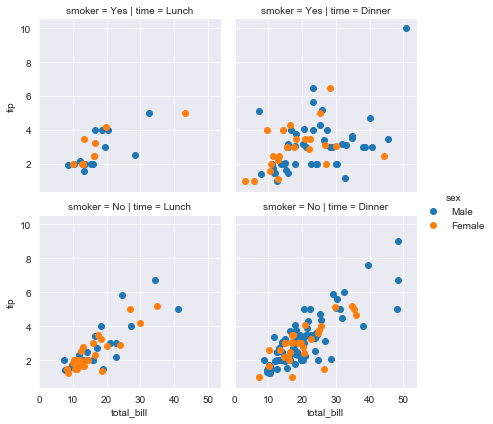

In [61]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice how the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

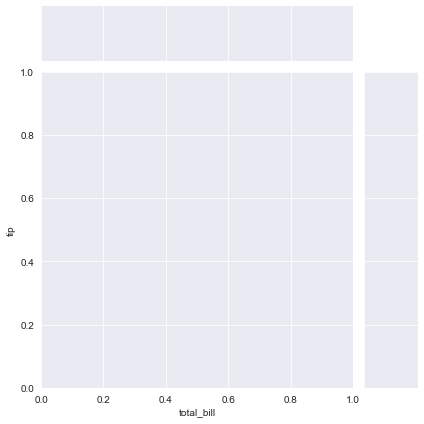

In [62]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

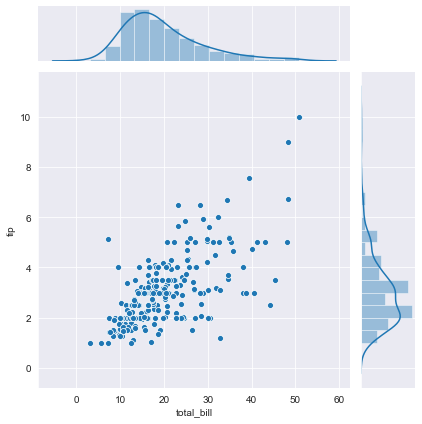

In [66]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.scatterplot, sns.distplot)

## Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data

Let's begin by exploring seaborn's heatmap:

## Heatmap


A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. 
It basically just to view correlation in the data
In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [67]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


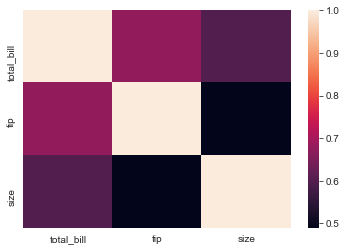

In [68]:
sns.heatmap(tips.corr())

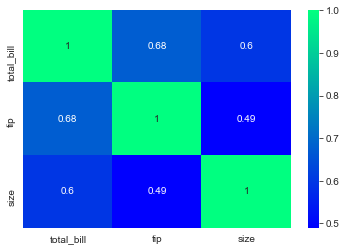

In [76]:
sns.heatmap(tips.corr(),cmap='winter',annot=True)
#The annot parameter is used to indicate the variation of each box 

The color is thickest at the point where there's greater correlation. Just like where 1 is indicated means there is more correlation between the features

## GOOD LUCK